In [2]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import DefineModel_OCTnet
import DefineModel
import time
import re
import matplotlib.pyplot as plt

In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# Define variables
input_shape = (227, 227, 3)
classes = 11

start = time.time()
# Import data from pretrain to arrays somehow
X = []
Y = []

path = '../ODIR-5K/ODIR-5K/Training Images'
path_preproc = '../preprocessed_images'

count = 0
for file_name in os.listdir(path):
    if file_name == '.ipynb_checkpoints':
        break
    im = cv2.imread(os.path.join(path_preproc, file_name))
    if np.shape(im) != (512,512,3):
        print(file_name, np.shape(im))
        continue
    split = re.split(r'[.,]',file_name)
    label_name = split[0] + '.txt'
    label = np.loadtxt(os.path.join('labels', label_name))
    count+=1
#     if count == 3000:
#         break

    #lines = text_file.read().split(',')
    im = cv2.resize(im,(227,227))
    im = im/255
    X.append(im)
    Y.append(label)    
    
# convert to numpy array for training
X = np.array(X, dtype = np.float)
Y = np.array(Y, dtype = np.float)

1005_left.jpg ()
1014_left.jpg ()
1017_left.jpg ()
1017_right.jpg ()
1018_left.jpg ()
1020_right.jpg ()
1033_left.jpg ()
1036_left.jpg ()
1036_right.jpg ()
104_left.jpg ()
104_right.jpg ()
1061_left.jpg ()
1062_left.jpg ()
1065_right.jpg ()
1066_left.jpg ()
1077_left.jpg ()
1087_left.jpg ()
1087_right.jpg ()
1089_right.jpg ()
108_left.jpg ()
1095_right.jpg ()
1096_right.jpg ()
109_left.jpg ()
109_right.jpg ()
1101_left.jpg ()
1101_right.jpg ()
1116_left.jpg ()
1121_left.jpg ()
1123_right.jpg ()
1127_left.jpg ()
1130_left.jpg ()
1131_left.jpg ()
1131_right.jpg ()
1134_left.jpg ()
1134_right.jpg ()
1137_right.jpg ()
1140_left.jpg ()
1140_right.jpg ()
1142_left.jpg ()
1145_left.jpg ()
1148_left.jpg ()
114_left.jpg ()
1156_right.jpg ()
1162_right.jpg ()
1163_left.jpg ()
1163_right.jpg ()
1177_left.jpg ()
1208_left.jpg ()
1208_right.jpg ()
1228_right.jpg ()
1236_left.jpg ()
1236_right.jpg ()
1242_left.jpg ()
1243_left.jpg ()
124_right.jpg ()
1254_left.jpg ()
1263_left.jpg ()
1273_left.jpg (

<ipython-input-3-a05bac9f6e04>:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(X, dtype = np.float)
<ipython-input-3-a05bac9f6e04>:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = np.array(Y, dtype = np.float)


(6392, 227, 227, 3) (227, 227, 3)
(6392, 11)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 32)      4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 227, 227, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 113, 113, 32)      50208     
_________________________________________________________________
batch_normalization_1 (Batch (None, 113, 113, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (C

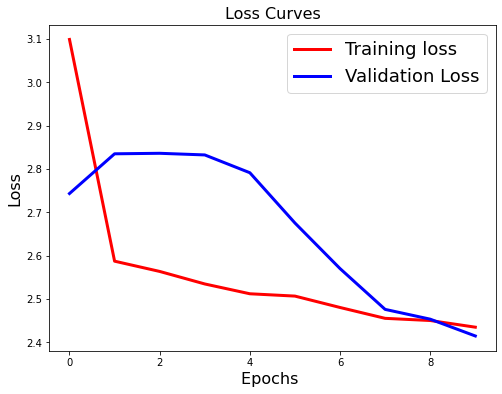

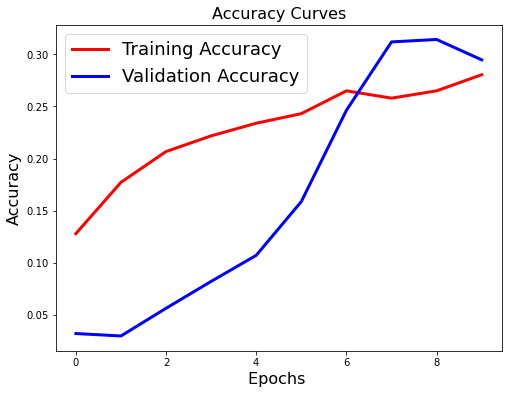

In [4]:
print(np.shape(X), np.shape(X[0]))
print(np.shape(Y))
model = DefineModel_OCTnet.createModel(input_shape,classes)
print(model.summary())

# compile model, might need changes to loss and optimizer

# model.compile(optimizer=optimizers.Adam(0.001), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

sgd = optimizers.SGD(lr = 0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


print('-TRAINING----------------------------')
# print('Input shape:', X.shape)
# print('Number Images: ', X.shape[0])

# Whatever we want here
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.8,test_size=0.2, shuffle= True)

# Def change epochs and batch size
# 
history = model.fit(x=x_train,y=y_train, epochs=10, batch_size = 256, validation_data=(x_valid, y_valid))

# serialize weights to HDF5
model.save_weights("model_weights.h5")

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()